[![View on GitHub](https://img.shields.io/badge/GitHub-View_on_GitHub-blue?logo=GitHub)](https://github.com/khuyentran1401/Data-science/blob/master/data_science_tools/Datapane_new_features/analyzing_articles.ipynb)

[<img src="https://deepnote.com/buttons/launch-in-deepnote.svg">](https://deepnote.com/project/Data-science-hxlyJpi-QrKFJziQgoMSmQ/%2FData-science%2Fdata_science_tools%2FDatapane_new_features%2Fanalyzing_articles.ipynb)

 [![View Article](https://img.shields.io/badge/View%20Article-View%20Full%20Article-red)](https://towardsdatascience.com/datapanes-new-features-create-a-beautiful-dashboard-in-python-in-a-few-lines-of-code-a3c44523292b)

## Get article

In [ ]:
!pip install datapane==0.12.3 newspaper3k wordcloud contractions inflect

In [ ]:
%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
pandas      : 1.2.5
contractions: 0.0.52
matplotlib  : 3.4.3
nltk        : 3.6.3
plotly      : 5.3.1
numpy       : 1.19.5
psycopg2    : 2.9.1 (dt dec pq3 ext lo64)
datapane    : 0.12.3
re          : 2.2.1
inflect     : 5.3.0



In [ ]:
import datapane as dp 
from newspaper import Article
from IPython.display import Image
from IPython.core.display import HTML 
import nltk 
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd 

In [ ]:
import os

TOKEN = os.environ["DATAPANE_TOKEN"]
dp.login(TOKEN)

In [ ]:
report = []

In [ ]:
url = 'https://www.dataquest.io/blog/learn-data-science/'
article = Article(url)
article.download()

In [ ]:
article.parse()

## Download Image

In [ ]:
publish_date = str(article.publish_date)
publish_date

'2020-05-04 07:01:00+00:00'

In [ ]:
text = article.text 

In [ ]:
image_url = article.top_image
Image(url=image_url)

In [ ]:
image_url

'https://www.dataquest.io/wp-content/uploads/2020/05/learn-data-science.jpg'

In [ ]:
!wget 'https://www.dataquest.io/wp-content/uploads/2020/05/learn-data-science.jpg'

--2021-10-12 02:01:51--  https://www.dataquest.io/wp-content/uploads/2020/05/learn-data-science.jpg
Resolving www.dataquest.io (www.dataquest.io)... 162.159.135.42, 162.159.134.42, 2606:4700:7::a29f:872a, ...
Connecting to www.dataquest.io (www.dataquest.io)|162.159.135.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29758 (29K) [image/jpeg]
Saving to: ‘learn-data-science.jpg’

learn-data-science. 100%[===================>]  29.06K  --.-KB/s    in 0.04s   

2021-10-12 02:01:51 (773 KB/s) - ‘learn-data-science.jpg’ saved [29758/29758]



In [ ]:
page = dp.Page(
    '# Raw Article Information',
    '## Article URL', url,
    '## Publish date', publish_date,
    '## Image', dp.File(file='./learn-data-science.jpg'),
    title='Raw article'
    )

Bokeh version 2.3.3 is not supported, these plots may not display correctly, please install version ~=2.2.0


In [ ]:
report.append(page)

## Summary

### Wordcloud

In [ ]:
def make_wordcloud(new_text):
    ''''funciton to make wordcloud'''

    wordcloud = WordCloud(width=800, height=800,
                          min_font_size=10,
                          background_color='black',
                          colormap='Set2',
                          collocations=False).generate(new_text)

    fig = plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

    return fig


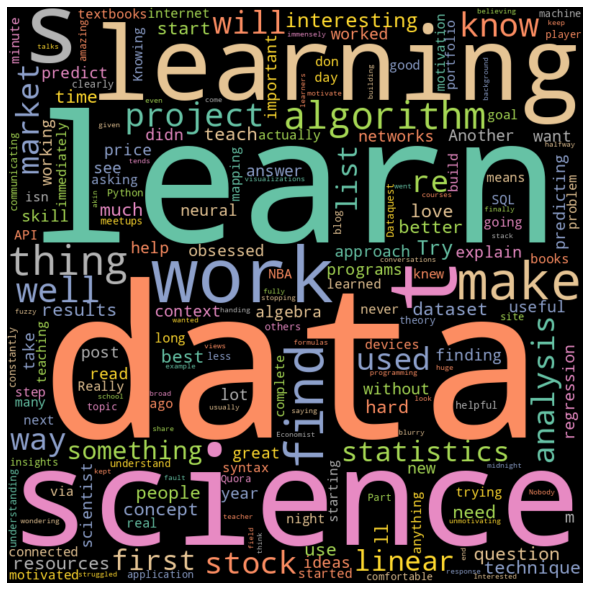

In [ ]:
wordcloud = make_wordcloud(article.text)

In [ ]:
wordcloud.savefig('wordcloud.png')

In [ ]:
code = """
def make_wordcloud(new_text):
    ''''funciton to make wordcloud'''

    wordcloud = WordCloud(width=800, height=800,
                          min_font_size=10,
                          background_color='black',
                          colormap='Set2',
                          collocations=False).generate(new_text)

    fig = plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

    return fig


wordcloud = make_wordcloud(article.text)"""

In [ ]:
select = dp.Select(
    dp.File(file='wordcloud.png', label='WordCloud'),
    dp.Code(code, label='Source code'),
)

### Natural Language Processing

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
article.nlp()

In [ ]:
# Extract keywords
keywords = article.keywords
keywords_print = f"Keywords of this article are {', '.join(keyword for keyword in keywords)}."

In [ ]:
# Summary
summary = article.summary
summary

'The first step to learning data science is usually asking “how do I learn data science?”.\nIf you want to learn data science, your first goal should be to learn to love data.\nLearn data science by doingLearning about neural networks, image recognition, and other cutting-edge techniques is important.\nI personally believe that anyone can learn data science if they approach it with the right frame of mind.\nI’m also the founder of Dataquest, a site that helps you learn data science in your browser.'

### Count word occurences

In [ ]:
import re
import string
import unicodedata
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer


def replace_contractions(text):
    """Fixes contractions such as 'you're' to you 'are'"""
    return contractions.fix(text)


def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    return [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in words]


def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return [word.lower() for word in words]


def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    return [re.sub(r'[^\w\s]', '', word) for word in words]


def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    return [p.number_to_words(word) if word.isdigit() else word for word in words]


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stopwords.words('english')]


def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    return [stemmer.stem(word) for word in words]


def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word, pos='v') for word in words]

def remove_space(words):
    """Remove space from a list of tokenized words"""
    words = ' '.join(words).replace('  ', ' ').strip().split(' ')
    return [word for word in words if word != '']

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = remove_space(words)
    return words
    

def preprocess(sample):
    sample = remove_URL(sample)
    sample = replace_contractions(sample)
    
    # Tokenize
    words = nltk.word_tokenize(sample)
    
    # Normalize
    words = normalize(words)

    return words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
processed_words = preprocess(text)
fdist = FreqDist(processed_words)

In [ ]:
word_count_df = pd.DataFrame.from_dict(dict(fdist), orient='index')

word_count_df = word_count_df.reset_index().rename(columns={0: 'frequency', 'index': 'word'})

word_count_df = word_count_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

In [ ]:
word_count_df[:50]

,word,frequency
0,data,37
1,learn,25
2,science,22
3,learning,16
4,work,10
5,find,10
6,make,8
7,well,8
8,know,7
9,way,6


In [ ]:
fig = px.bar(word_count_df[:50],
             x='word', y='frequency',
            title='Word frequency')
fig 

In [ ]:
group = dp.Group(
    dp.Plot(fig),
    dp.DataTable(word_count_df),
    columns=2
    )

In [ ]:
page = dp.Page('# Summary',
               '## Word cloud', select,
               '## Summary', summary,
               '## Keywords', keywords_print,
               '## Most common words', group,
               title='Summary')

In [ ]:
report.append(page)

## Publish report

In [ ]:
dp.Report(*report).upload(name='analyze_article',
                           description='Summarize article, extract and visualize keywords',
                          )

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/khuyentran1401/reports/analyze-article/ - you can edit and add additional text from the link

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87197226-98be-42b2-8527-389082831299' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>